# Homework 1. Exploratory Data Analysis

Due: Thursday, September 18, 2014 11:59 PM

<a href=https://raw.githubusercontent.com/cs109/2014/master/homework/HW1.ipynb download=HW1.ipynb> Download this assignment</a>

---

## Introduction

In this homework we ask you three questions that we expect you to answer using data. For each question we ask you to complete a series of tasks that should help guide you through the data analysis. Complete these tasks and then write a short (100 words or less) answer to the question.

**Note**: We will briefly discuss this homework assignment on Thursday in class.

#### Data
For this assignment we will use two databases: 

1. The [Sean Lahman's Baseball Database](http://seanlahman.com/baseball-archive/statistics) which contains the "complete batting and pitching statistics from 1871 to 2013, plus fielding statistics, standings, team stats, managerial records, post-season data, and more. For more details on the latest release, please [read the documentation](http://seanlahman.com/files/database/readme2012.txt)."

2. [Gapminder](http://www.gapminder.org) is a great resource that contains over [500 data sets](http://www.gapminder.org/data/) related to world indicators such as income, GDP and life expectancy. 


#### Purpose

In this assignment, you will learn how to: 

a. Load in CSV files from the web. 

b. Create functions in python. 

C. Create plots and summary statistics for exploratory data analysis such as histograms, boxplots and scatter plots. 


#### Useful libraries for this assignment 

* [numpy](http://docs.scipy.org/doc/numpy-dev/user/index.html), for arrays
* [pandas](http://pandas.pydata.org/), for data frames
* [matplotlib](http://matplotlib.org/), for plotting

---

In [1]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import urllib
import zipfile
import scipy.stats
import io

## Problem 1

In Lecture 1, we showed a plot that provided evidence that the 2002 and 2003 Oakland A's, a team that used data science, had a competitive advantage. Since, others teams have started using data science as well. Use exploratory data analysis to determine if the competitive advantage has since disappeared. 

#### Problem 1(a) 
Load in [these CSV files](http://seanlahman.com/files/database/lahman-csv_2014-02-14.zip) from the [Sean Lahman's Baseball Database](http://seanlahman.com/baseball-archive/statistics). For this assignment, we will use the 'Salaries.csv' and 'Teams.csv' tables. Read these tables into a pandas `DataFrame` and show the head of each table. 

**Hint** Use the [requests](http://docs.python-requests.org/en/latest/), [StringIO](http://docs.python.org/2/library/stringio.html) and [zipfile](https://docs.python.org/2/library/zipfile.html) modules to get from the web.  

In [2]:
#your code here
def get_data():
    url = 'http://seanlahman.com/files/database/lahman-csv_2014-02-14.zip' 
    get = requests.get(url).content
    s = io.BytesIO(get)
    archive = zipfile.ZipFile(s, 'r')
    archive.printdir()
    sal = archive.open('Salaries.csv')
    salaries = pd.read_csv(sal)
    tm = archive.open('Teams.csv')
    teams = pd.read_csv(tm)
    return salaries,teams
salaries,teams = get_data()
print(salaries,teams)

File Name                                             Modified             Size
SchoolsPlayers.csv                             2013-12-04 14:15:40       180758
SeriesPost.csv                                 2013-12-05 22:30:18         8883
Teams.csv                                      2014-01-27 22:59:04       537313
TeamsFranchises.csv                            2013-12-04 14:15:40         3359
TeamsHalf.csv                                  2013-12-04 14:15:40         1609
AllstarFull.csv                                2013-12-05 22:36:24       201742
Appearances.csv                                2013-12-06 17:04:36      5816593
AwardsManagers.csv                             2014-01-31 09:57:46         7736
AwardsPlayers.csv                              2013-12-06 17:54:22       242812
AwardsShareManagers.csv                        2014-02-10 22:43:04        16878
AwardsSharePlayers.csv                         2013-12-04 14:15:38       222952
Batting.csv                             

#### Problem 1(b)

Summarize the Salaries DataFrame to show the total salaries for each team for each year. Show the head of the new summarized DataFrame. 

In [3]:
#your code here
totSalaries  = salaries.groupby(['yearID','teamID'],as_index=False).sum()
totSalaries 

,yearID,teamID,salary
0,1985,ATL,14807000
1,1985,BAL,11560712
2,1985,BOS,10897560
3,1985,CAL,14427894
4,1985,CHA,9846178
5,1985,CHN,12702917
6,1985,CIN,8359917
7,1985,CLE,6551666
8,1985,DET,10348143
9,1985,HOU,9993051


#### Problem 1(c)

Merge the new summarized Salaries DataFrame and Teams DataFrame together to create a new DataFrame
showing wins and total salaries for each team for each year year. Show the head of the new merged DataFrame.

**Hint**: Merge the DataFrames using `teamID` and `yearID`.

In [4]:
#your code here
joined = pd.merge(totSalaries,teams,how='inner',on=['yearID','teamID'])[['yearID','teamID','salary','W']]
joined.head()

,yearID,teamID,salary,W
0,1985,ATL,14807000,66
1,1985,BAL,11560712,83
2,1985,BOS,10897560,81
3,1985,CAL,14427894,90
4,1985,CHA,9846178,85


#### Problem 1(d)

How would you graphically display the relationship between total wins and total salaries for a given year? What kind of plot would be best? Choose a plot to show this relationship and specifically annotate the Oakland baseball team on the on the plot. Show this plot across multiple years. In which years can you detect a competitive advantage from the Oakland baseball team of using data science? When did this end? 

**Hints**: Use a `for` loop to consider multiple years. Use the `teamID` (three letter representation of the team name) to save space on the plot.  

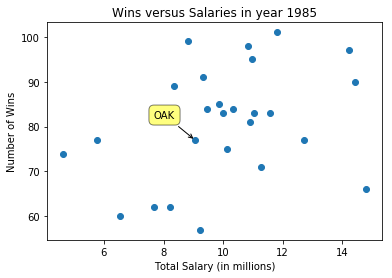

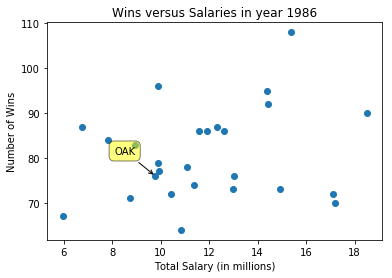

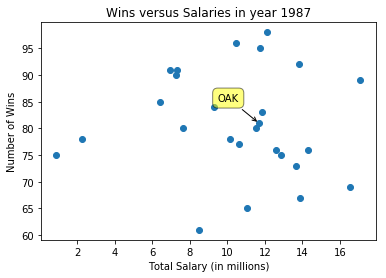

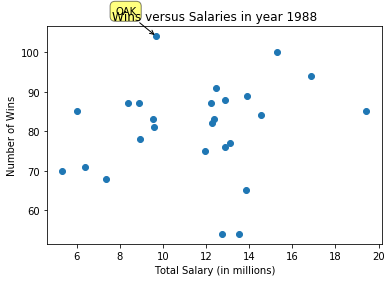

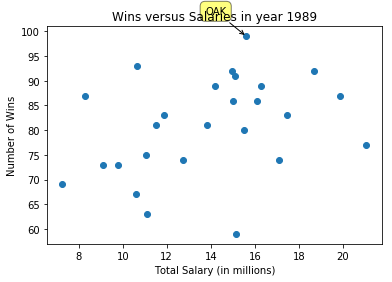

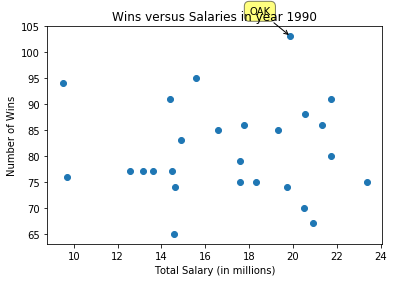

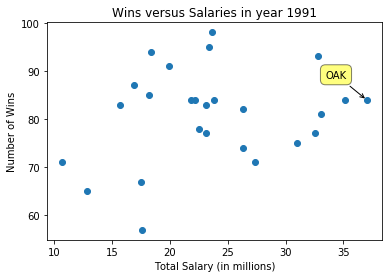

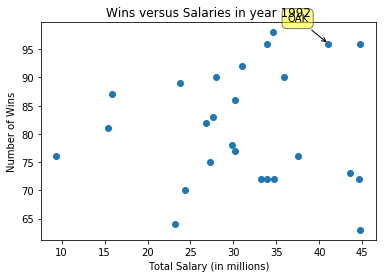

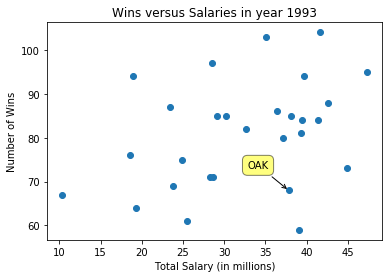

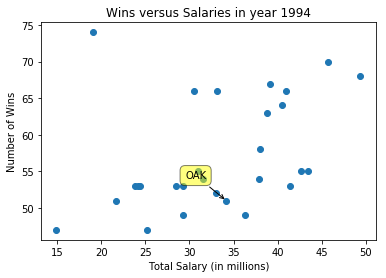

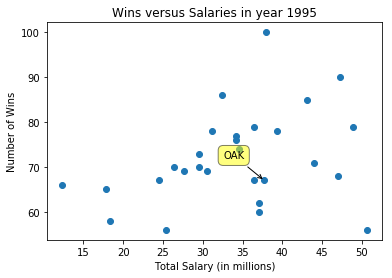

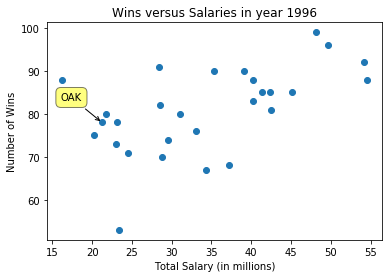

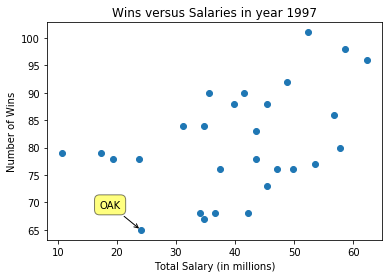

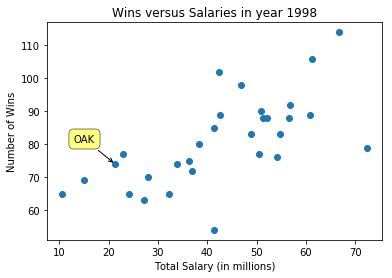

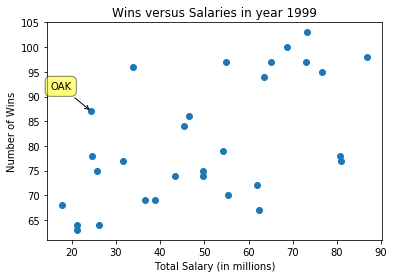

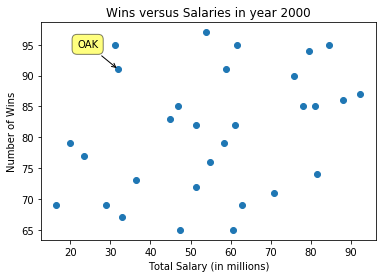

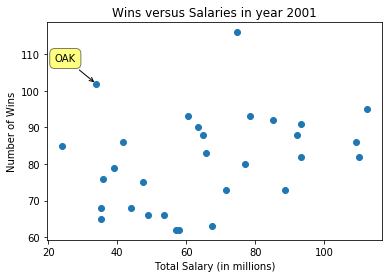

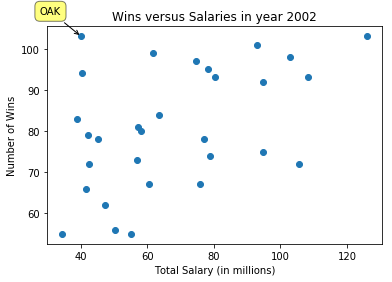

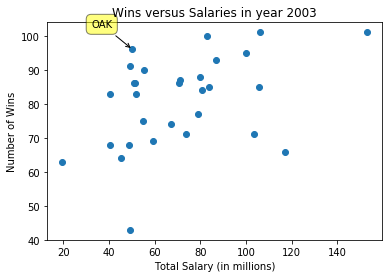

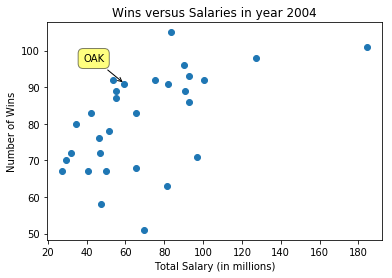

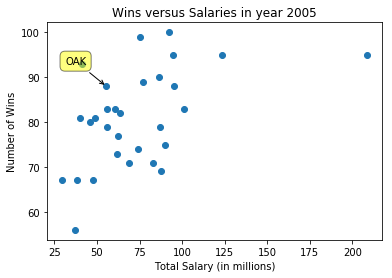

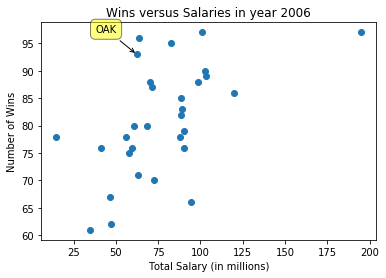

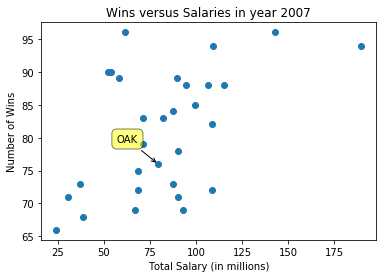

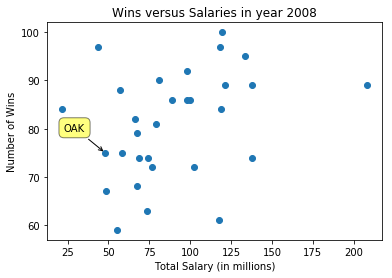

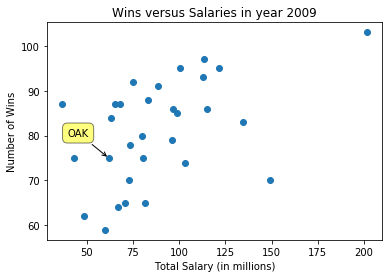

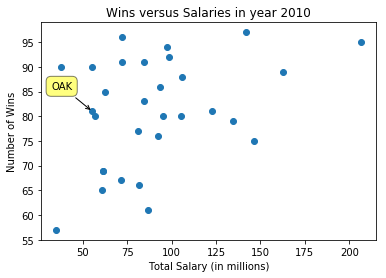

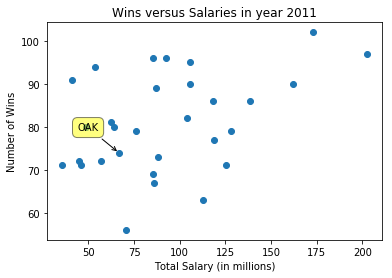

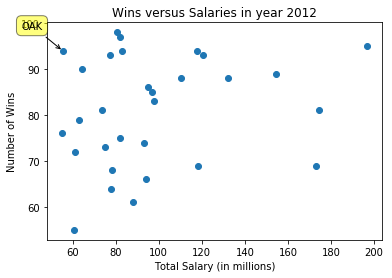

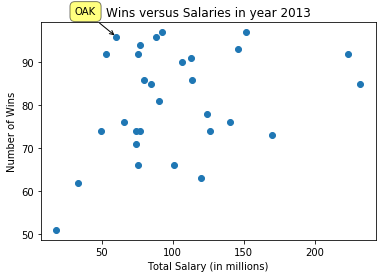

In [5]:
#your code here
#oak_stat = joined[joined.teamID == 'OAK']
#plt.scatter(oak_stat.yearID,oak_stat.salary)
teamName = 'OAK'
year = joined.yearID.unique()
for i in year:
    current_data = joined[joined.yearID == i]
    plt.scatter(current_data.salary/1000000,current_data.W)
    plt.title('Wins versus Salaries in year '+str(i))
    plt.xlabel('Total Salary (in millions)')
    plt.ylabel('Number of Wins')
    plt.annotate(teamName, 
        xy = (current_data['salary'][current_data['teamID'] == teamName] / 1e6,  current_data['W'][current_data['teamID'] == teamName]), 
        xytext = (-20, 20), textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', facecolor = 'black' , connectionstyle = 'arc3,rad=0'))
    
    plt.show()

#### Problem 1(e):

**For AC209 Students**: Fit a linear regression to the data from each year and obtain the residuals. Plot the residuals against time to detect patterns that support your answer in 1(d). 

In [6]:
#your code here

## Discussion for Problem 1

*Write a brief discussion of your conclusions to the questions and tasks above in 100 words or less.*

---


## Problem 2

Several media reports have demonstrated the income inequality has increased in the US during this last decade. Here we will look at global data. Use exploratory data analysis to determine if the gap between Africa/Latin America/Asia and Europe/NorthAmerica has increased, decreased or stayed the same during the last two decades. 

#### Problem 2(a)

Using the list of countries by continent from [World Atlas](http://www.worldatlas.com/cntycont.htm) data, load in the `countries.csv` file into a pandas DataFrame and name this data set as `countries`.  This data set can be found on Github in the 2014_data repository [here](https://github.com/cs109/2014_data/blob/master/countries.csv). 

In [35]:
#your code 
import urllib
url = 'https://raw.githubusercontent.com/cs109/2014_data/master/countries.csv'
get = requests.get(url).content
s = io.BytesIO(get)
countries = pd.read_csv(s)
countries

,Country,Region
0,Algeria,AFRICA
1,Angola,AFRICA
2,Benin,AFRICA
3,Botswana,AFRICA
4,Burkina,AFRICA
5,Burundi,AFRICA
6,Cameroon,AFRICA
7,Cape Verde,AFRICA
8,Central African Republic,AFRICA
9,Chad,AFRICA
